# Solución de modelos de sistemas presa-depredador
### 1.2 Introducción
Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa  son un par de ecuaciones diferenciales de primer orden no lineales que se usan para describir dinámicas de sistemas biológicos en el que dos especies interactúan y que marcaron una revolución en la ciencia teórica ambiental. Las ecuaciones fueron propuestas de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926.   

A partir de ahí se han usado una gran multitud de variaciones sobre estos modelos que incluyen distintos parámetros para modelar las dinámicas de las relaciones entre presa y depredador para modelos ecológicos así como el número de presas o depredadores. Sus aplicaciones pueden ser muy variadas y van desde predecir el comportamiento de los animales en los ecosistemas, su uso en reservas naturales para asegurar las poblaciones de los seres vivos que ahí se encuentran o inclusive más allá y tener aplicaciones en economía para modelar oferta y demanda o algún otro proceso económico.

![](https://cdn.pixabay.com/photo/2014/08/23/11/12/lion-425150_960_720.jpg)

### 1.3 Objetivos.
> #### 1.1 Objetivo general.
> Resolver un sistema de ecuaciones diferenciales con python.
> #### 1.2 Objetivos específicos
>  - Formular adecuadamente el modelo que represente el problema.
>  - Identificar correctamente las variables y los parametros.
>  - Utilizar las librerias de Python para encontrar la solución basado en las condiciones iniciales.

### 1.4 Modelo que representa el problema

#### Shiva et al
El modelo que se va a utilizar es uno planteado Shiva, Srinivas y Pavans de un depredador y dos presas basado en modelos previamente utilizados por algunos otros investigadores,  que se basan en el modelo de Lotka- Volterra de una presa y un depredador.
En este caso no se representan poblaciones sino densidades de poblaciones. 

$x(t)$ = densidad de población de presa 1 a tiempo t  
$y(t)$ = densidad de población de presa 2 a tiempo t  
$z(t)$ = densidad de población de depredador a tiempo t  

$$
\begin{array}{l}
\frac{d x}{d t}=r_1 x\left(1-\frac{x}{k_1}\right)-\alpha_{13} x z \\
\frac{d y}{d t}=r_2 y\left(1-\frac{y}{k_2}\right)-\alpha_{23} y z \\
\frac{d z}{d t}=-d z-\alpha_{33} z ^2 w_{1} +\alpha_{31}x(t-\tau)z(t - \tau) +\alpha_{32}y(t-\tau)z(t - \tau)  
\end{array}
$$

#### Parámetros
Todos los parámetros usados en este modelo son positivos    
$r_1$ y $r_2$ son el ritmo de crecimiento de las presas $x$ y $y$ respectivamente  
$\alpha_{13}$ y $\alpha_{23}$ son la razón de decrecimiento de las presas respectivamente
$k_1$ y $k_2$ son la capacidad de almacenamiento del parque nacional de las presas $x$ y $y$ respectivamente   
$d$ es el ratio de mortalidad del depredador  
$\tau$ representa el parámetro de retraso temporal  
$\alpha_{31}$ y $\alpha_{32}$ representan la razón de ganancia del depredador acorde a la depredación de las presas $x$ y $y$ respectivamente   
$\alpha_{33}$ representa la razón de decrecimiento del depredador debido a la competición intra especifica


### 1.5 Solución del problema

In [6]:
#pip install ddeint

  Created wheel for ddeint: filename=ddeint-0.2-cp37-none-any.whl size=3982 sha256=319f89546e827830665c5df1101dcb062d5f1ed47aa18354ac55b704b2948a7d
  Stored in directory: C:\Users\flavi\AppData\Local\pip\Cache\wheels\d4\a3\1d\6cdfd37036ecb725b287d310842331646aff4139903e367dbf
Successfully built ddeint
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [2]:
from ddeint import ddeint

In [3]:
from pylab import array, linspace, subplots

In [4]:
def shivadel (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 1.5
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [5]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

soll = ddeint(shivadel,g,tt,fargs=(0.06,))

In [6]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol2 = ddeint(shivadel,g,tt,fargs=(0.2,))

In [7]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol3 = ddeint(shivadel,g,tt,fargs=(0.04,))

In [8]:
def shivadell (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 7
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [9]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol4 = ddeint(shivadell,g,tt,fargs=(0.06,))

In [10]:
def shivadela (Y,t,tau):
    x,y,z = Y(t)
    xd, yd, zd = Y(t-tau)
    alpha13 = 2.036
    alpha23 = 4
    r1 = 0.625
    r2 = 1.228
    k1 = 10
    k2 = 10
    tau = 2
    alpha31 = 0.112
    alpha32 = 2.02
    alpha33 = 0.15
    c = 0.1
    dx = r1*x*(1-(x/k1)) - alpha13*x*z
    dy = r2*y*(1-(y/k2)) - alpha23*y*z
    dz = -(c*z) -alpha33*z**2  +alpha31*xd*zd +alpha32*yd*zd 
    return [dx,dy,dz]

In [11]:
# Intervalo de tiempo
tt = np.linspace(0,100,10000)

#Condición Inicial
g = lambda t: array([0.5,0.5,0.5])

tau = 0.06
# Solución

sol5 = ddeint(shivadela,g,tt,fargs=(0.06,))

### 1.6 Visualización de los resultados

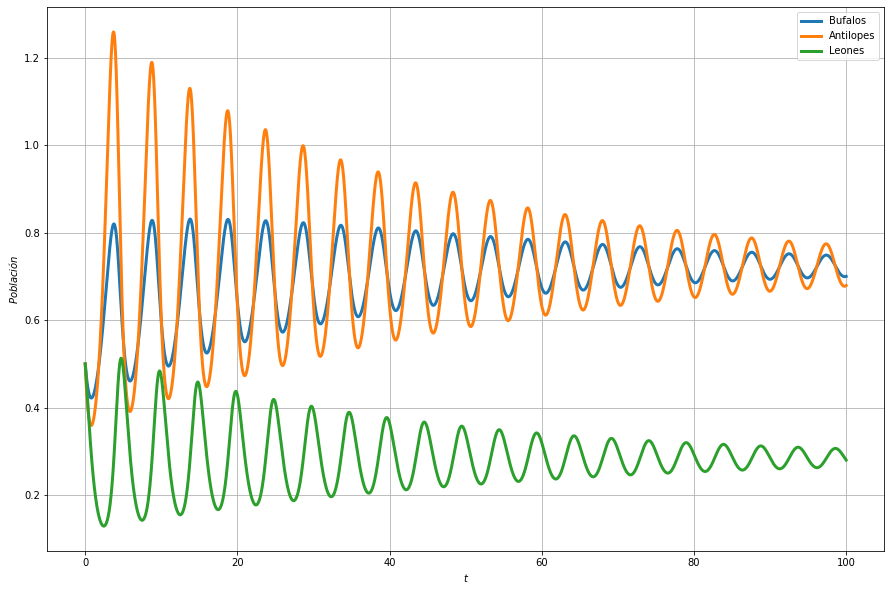

In [28]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol3[:,0], lw = 3, label = "Bufalos")
plt.plot(tt,sol3[:,1], lw = 3, label = "Antilopes")
plt.plot(tt,sol3[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

In [13]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Densidad de Población de Leones')

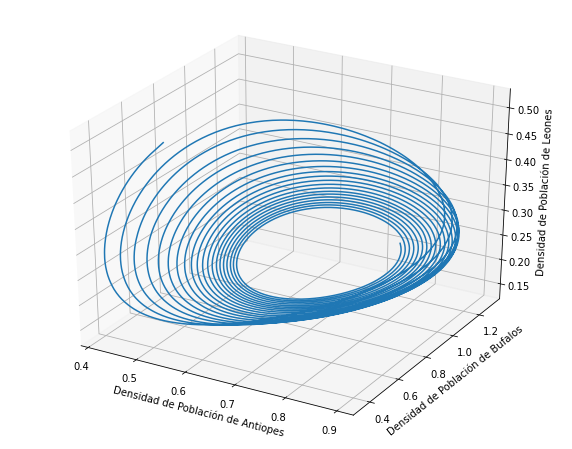

In [31]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(soll[:,0],soll[:,1],soll[:,2],ms=10)
ax.set_xlabel('Densidad de Población de Antiopes')
ax.set_ylabel('Densidad de Población de Bufalos')
ax.set_zlabel('Densidad de Población de Leones')

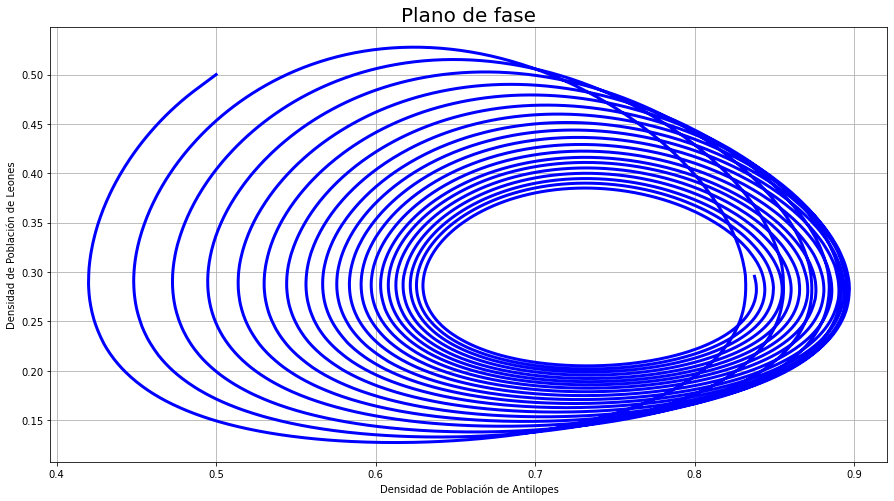

In [20]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(soll[:,0],soll[:,2],"b", lw = 3)
plt.xlabel("Densidad de Población de Antilopes")
plt.ylabel("Densidad de Población de Leones")
plt.grid()
plt.show()

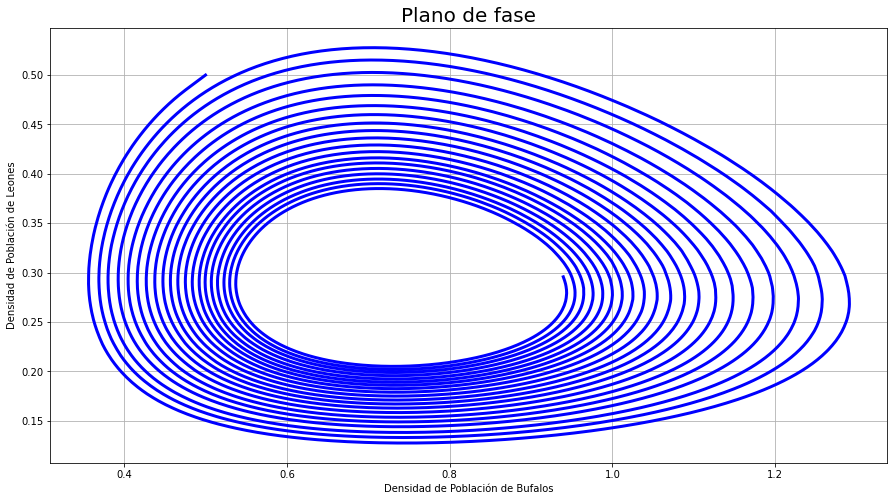

In [21]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(soll[:,1],soll[:,2],"b", lw = 3)
plt.xlabel("Densidad de Población de Bufalos")
plt.ylabel("Densidad de Población de Leones")
plt.grid()
plt.show()

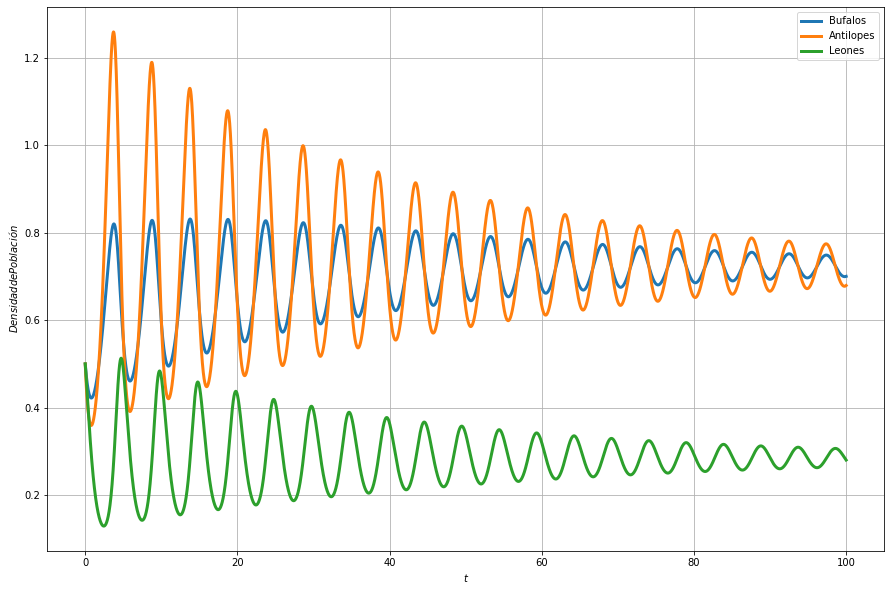

In [29]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol3[:,0], lw = 3, label = "Bufalos")
plt.plot(tt,sol3[:,1], lw = 3, label = "Antilopes")
plt.plot(tt,sol3[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Densidad de Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

Text(0.5, 0, 'Densidad de Población de Leones')

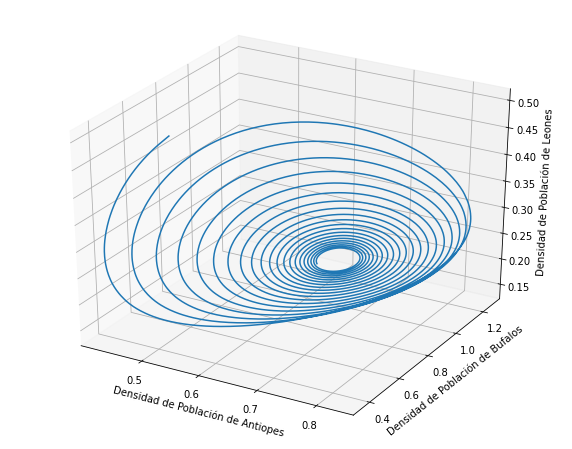

In [30]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol3[:,0],sol3[:,1],sol3[:,2],ms=10)
ax.set_xlabel('Densidad de Población de Antiopes')
ax.set_ylabel('Densidad de Población de Bufalos')
ax.set_zlabel('Densidad de Población de Leones')

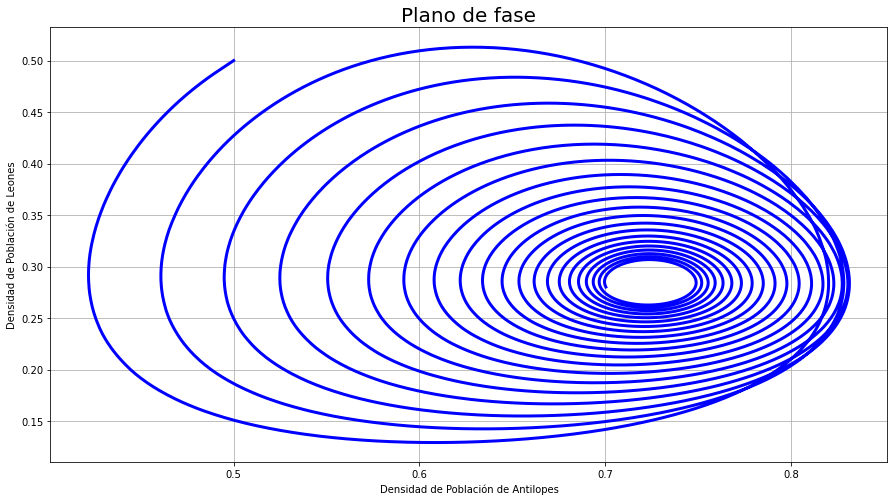

In [24]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol3[:,0],sol3[:,2],"b", lw = 3)
plt.xlabel("Densidad de Población de Antilopes")
plt.ylabel("Densidad de Población de Leones")
plt.grid()
plt.show()

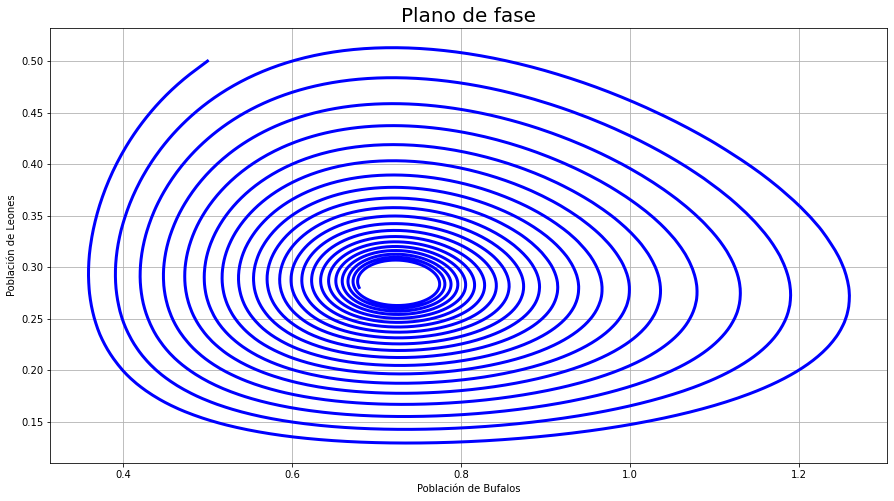

In [35]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol3[:,1],sol3[:,2],"b", lw = 3)
plt.xlabel("Población de Bufalos")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

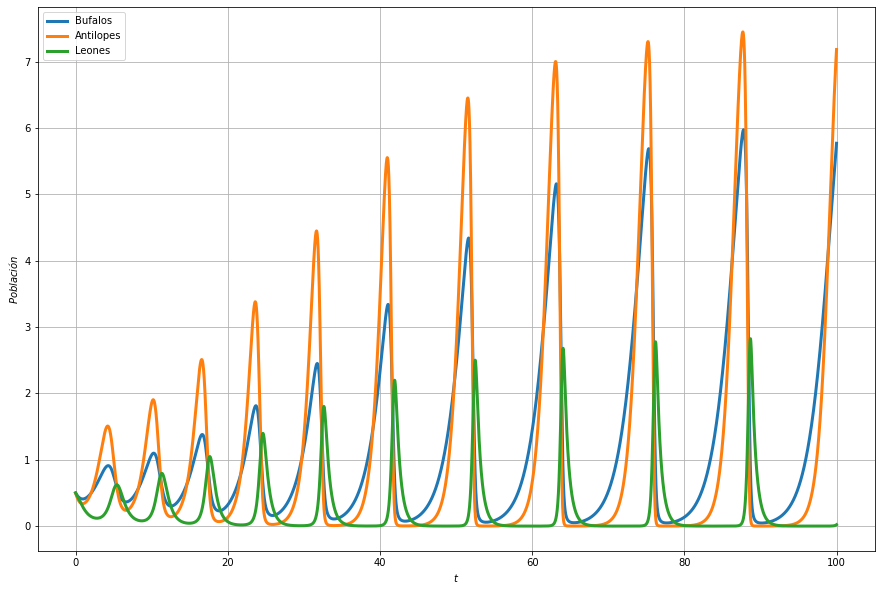

In [41]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol2[:,0], lw = 3, label = "Bufalos")
plt.plot(tt,sol2[:,1], lw = 3, label = "Antilopes")
plt.plot(tt,sol2[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

Text(0.5, 0, 'Densidad de Población de Leones')

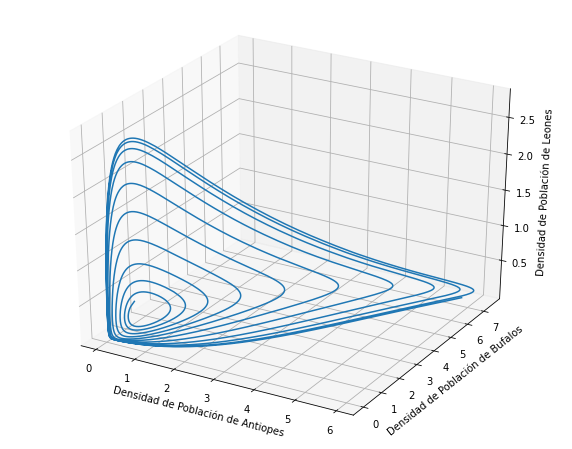

In [32]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol2[:,0],sol2[:,1],sol2[:,2],ms=10)
ax.set_xlabel('Densidad de Población de Antiopes')
ax.set_ylabel('Densidad de Población de Bufalos')
ax.set_zlabel('Densidad de Población de Leones')

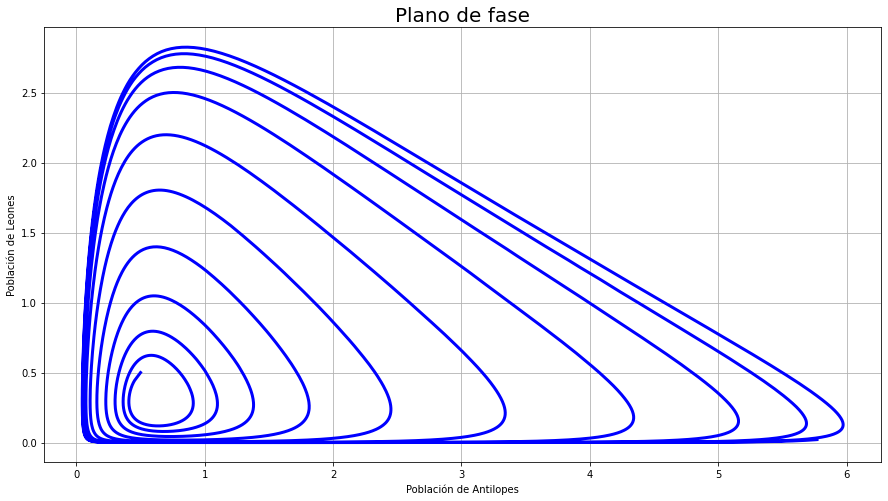

In [37]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol2[:,0],sol2[:,2],"b", lw = 3)
plt.xlabel("Población de Antilopes")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

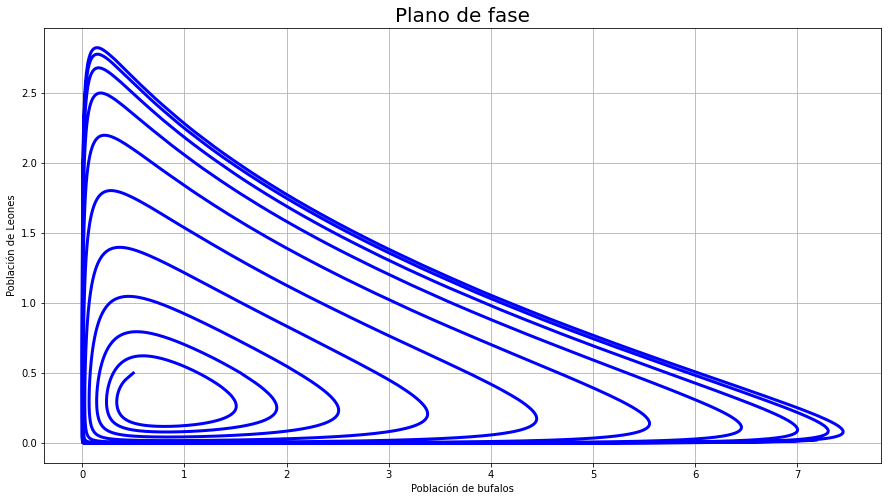

In [38]:
plt.figure(figsize=(15,8))
plt.title("Plano de fase", fontsize=20)
plt.plot(sol2[:,1],sol2[:,2],"b", lw = 3)
plt.xlabel("Población de bufalos")
plt.ylabel("Población de Leones")
plt.grid()
plt.show()

Como se puede ver en las primeras 3 soluciones replicamos los resultados del artículo de Shiva, y se puede ver como en las distintos escenarios donde se cambia el parámetro del retraso conforme se va haciendo más grande se tienen picos más altos en las densidades de la población y que al final se afecta las dinámicas, en todos los casos se ve cómo se va convergiendo a un punto de estabilidad en la población debido a las interacciones entre las presas y el depredador y como en estos casos puede haber una convivencia entre las especies siendo una de las presas la que tiene menores picos de población debido a ser más fácil cazada por el depredador por la diferencia en los parámetros. También algo interesante que se puede observar es como el aumento en la población de las presas es quien da origen a los ciclos del depredador y viceversa.

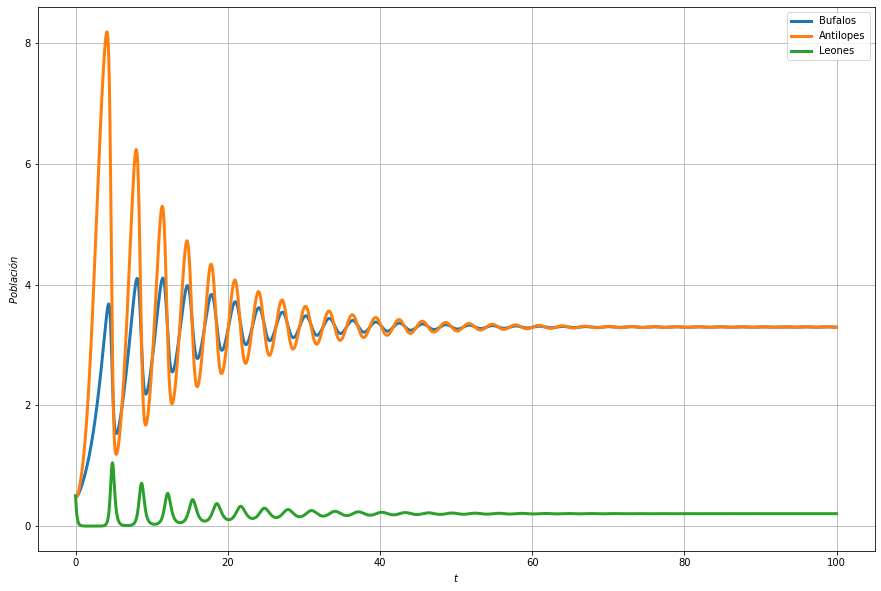

In [42]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol4[:,0], lw = 3, label = "Bufalos")
plt.plot(tt,sol4[:,1], lw = 3, label = "Antilopes")
plt.plot(tt,sol4[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

Text(0.5, 0, 'Densidad de Población de Leones')

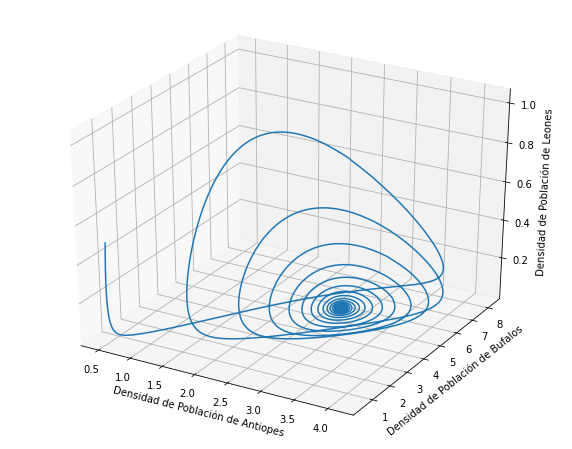

In [33]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol4[:,0],sol4[:,1],sol4[:,2],ms=10)
ax.set_xlabel('Densidad de Población de Antiopes')
ax.set_ylabel('Densidad de Población de Bufalos')
ax.set_zlabel('Densidad de Población de Leones')

Al aumentar la mortalidad del depredador se puede observar como las presas tienen un crecimiento mayor aunque sigue estando condicionado al ambiente y está ligeramente influenciado por la población del depredador.

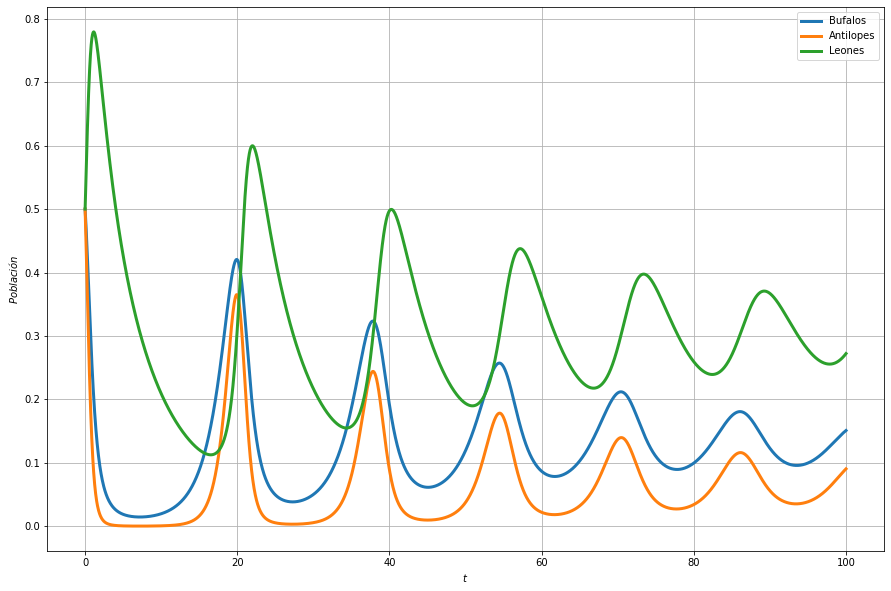

In [43]:
plt.figure(figsize = (15,10))
plt.plot(tt,sol5[:,0], lw = 3, label = "Bufalos")
plt.plot(tt,sol5[:,1], lw = 3, label = "Antilopes")
plt.plot(tt,sol5[:,2], lw = 3, label = "Leones")
plt.xlabel("$t$")
plt.ylabel('$Población$')
plt.legend(loc = "best")
plt.grid()
plt.show()

Text(0.5, 0, 'Densidad de Población de Leones')

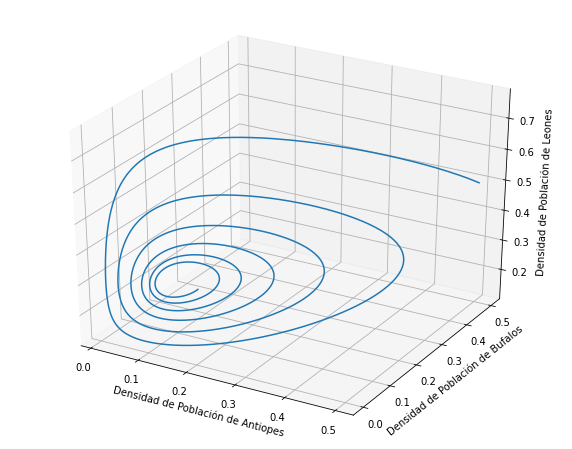

In [34]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(sol5[:,0],sol5[:,1],sol5[:,2],ms=10)
ax.set_xlabel('Densidad de Población de Antiopes')
ax.set_ylabel('Densidad de Población de Bufalos')
ax.set_zlabel('Densidad de Población de Leones')

Al disminuir el parámetro de la mortalidad del depredador se puede observar un aumento muy fuerte de su población que hace que las presas se vean casi en la extinción pero que esto hace que disminuya la población de leones y que pueda volver a formarse una población de presas que a su vez esto va a provocar un aumento en los depredadores.

### 1.7 Conclusiones.
●Aprendimos a utilizar una nueva paquetería para resolver este problema, ya qué en la que vimos en clases no podiamos incluir tiempos.   
●La solución 1 llega a ser un ambiente donde las 3 especies se mantienen existiendo  
●Cumplimos los objetivos establecidos en el Proyecto y logramos llevar a la práctica nuestros conocimientos.  

### 1.8 Referencias.
> Gebreyohannes, Gebretsadkan. (2016). Prey switching in predtor prey model. 10.13140/RG.2.1.5092.3125. 

> K. Shiva Reddy, M.N. Srinivas, C.V. Pavan Kumar,Dynamics of a two prey and one predator system with time interruption and random fluctuations,Pacific Science Review A: Natural Science and Engineering,Volume 18, Issue 2,2016,Pages 150-156,ISSN 2405-8823, https://doi.org/10.1016/j.psra.2016.10.002.